<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Техническое-задание" data-toc-modified-id="Техническое-задание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Техническое задание</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-расчета-коэффициента-эффективности-обогащения" data-toc-modified-id="Проверка-расчета-коэффициента-эффективности-обогащения-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверка расчета коэффициента эффективности обогащения</a></span></li><li><span><a href="#Анализ-отличий-признаков-в-выборках" data-toc-modified-id="Анализ-отличий-признаков-в-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ отличий признаков в выборках</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Проанализируем-концентрацию-металлов-на-каждом-этапе-очистки" data-toc-modified-id="Проанализируем-концентрацию-металлов-на-каждом-этапе-очистки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проанализируем концентрацию металлов на каждом этапе очистки</a></span></li><li><span><a href="#Сравним-размеры-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравним-размеры-гранул-сырья-на-обучающей-и-тестовой-выборках-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Сравним размеры гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Суммарная-концентрация-всех-веществ" data-toc-modified-id="Суммарная-концентрация-всех-веществ-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Суммарная концентрация всех веществ</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Вычисление-итоговой-sMAPE:-функции" data-toc-modified-id="Вычисление-итоговой-sMAPE:-функции-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вычисление итоговой sMAPE: функции</a></span></li><li><span><a href="#Подготовим-данные-для-построения-моделей:" data-toc-modified-id="Подготовим-данные-для-построения-моделей:-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Подготовим данные для построения моделей:</a></span></li><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выборке-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Проверка лучшей модели на тестовой выборке</a></span></li><li><span><a href="#Оценка-успешности-выбранной-модели" data-toc-modified-id="Оценка-успешности-выбранной-модели-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Оценка успешности выбранной модели</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота из руды

## Техническое задание

Подготовьте прототип модели машинного обучения для компании, разрабатывающей решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

В ходе работы данные подготавливаются для анализа, проводится исследовательский анализ данных, строится модель. Используются простые модели: дерево решений, случайный лес, линейная регрессия. Результаты сравниваются со случайной моделью. Для подбора параметров и лучших результатов работы модели используется кросс-валидация. Для оценки работы моделей используется метрика MAE и кастомная метрика SMAPE. Работа ведётся с ипользованием библиотек pandas, matplotlib, numpy, seaborn, scipy, missingno, sklearn.

## Подготовка данных

Импортируем модули, которые нам понадобятся для дальнейшей работы.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy import stats as st
!pip install missingno
import missingno as msno

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import (mean_absolute_error,
                             make_scorer)
import warnings
warnings.simplefilter('ignore')

Defaulting to user installation because normal site-packages is not writeable


Читаем базы данных.

In [ ]:
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', sep= ',')
display(df_full.head().T)
df_full.info()

,0,1,2,3,4
date,2016-01-15 00:00:00,2016-01-15 01:00:00,2016-01-15 02:00:00,2016-01-15 03:00:00,2016-01-15 04:00:00
final.output.concentrate_ag,6.0554,6.02937,6.05593,6.04798,6.1486
final.output.concentrate_pb,9.88965,9.96894,10.214,9.97702,10.1425
final.output.concentrate_sol,5.50732,5.25778,5.38376,4.85863,4.93942
final.output.concentrate_au,42.192,42.7016,42.6575,42.6898,42.7741
...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,-498.31,-500.17,-500.129,-499.202,-501.687
secondary_cleaner.state.floatbank5_b_air,8.07967,7.98476,8.01388,7.97732,7.89424
secondary_cleaner.state.floatbank5_b_level,-500.471,-500.582,-500.518,-500.256,-500.356
secondary_cleaner.state.floatbank6_a_air,14.1513,13.9984,14.0287,14.0056,13.9966


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

In [ ]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', sep= ',')
display(df_train.head().T)
df_train.info()

,0,1,2,3,4
date,2016-01-15 00:00:00,2016-01-15 01:00:00,2016-01-15 02:00:00,2016-01-15 03:00:00,2016-01-15 04:00:00
final.output.concentrate_ag,6.0554,6.02937,6.05593,6.04798,6.1486
final.output.concentrate_pb,9.88965,9.96894,10.214,9.97702,10.1425
final.output.concentrate_sol,5.50732,5.25778,5.38376,4.85863,4.93942
final.output.concentrate_au,42.192,42.7016,42.6575,42.6898,42.7741
...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,-498.31,-500.17,-500.129,-499.202,-501.687
secondary_cleaner.state.floatbank5_b_air,8.07967,7.98476,8.01388,7.97732,7.89424
secondary_cleaner.state.floatbank5_b_level,-500.471,-500.582,-500.518,-500.256,-500.356
secondary_cleaner.state.floatbank6_a_air,14.1513,13.9984,14.0287,14.0056,13.9966


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

In [ ]:
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', sep= ',')
display(df_test.head().T)
df_test.info()

,0,1,2,3,4
date,2016-09-01 00:59:59,2016-09-01 01:59:59,2016-09-01 02:59:59,2016-09-01 03:59:59,2016-09-01 04:59:59
primary_cleaner.input.sulfate,210.801,215.392,215.26,215.336,199.099
primary_cleaner.input.depressant,14.9931,14.9875,12.8849,12.0068,10.6825
primary_cleaner.input.feed_size,8.08,8.08,7.78667,7.64,7.53
primary_cleaner.input.xanthate,1.00502,0.990469,0.996043,0.863514,0.805575
primary_cleaner.state.floatbank8_a_air,1398.98,1398.78,1398.49,1399.62,1401.27
primary_cleaner.state.floatbank8_a_level,-500.226,-500.057,-500.868,-498.864,-500.808
primary_cleaner.state.floatbank8_b_air,1399.14,1398.06,1398.86,1397.44,1398.13
primary_cleaner.state.floatbank8_b_level,-499.92,-499.778,-499.765,-499.211,-499.505
primary_cleaner.state.floatbank8_c_air,1400.1,1396.15,1398.08,1400.13,1402.17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

Мы получили базу данных из 87 признаков. Всего в базе 19439 записей.

В тестовую выборку попали 5290 записей, в тренировочную - 14149. Полная база содержит данные обеих выборок.

### Проверка расчета коэффициента эффективности обогащения
Основной анализируемый признак в данном проекте - эффективность обогащения. Она должна быть рассчитана по формуле:

![image.png](attachment:image.png)

где:
+ C — доля золота в концентрате после флотации/очистки;
+ F — доля золота в сырье/концентрате до флотации/очистки;
+ T — доля золота в отвальных хвостах после флотации/очистки.
Проверим расчёт эффективности обогащения на обучающей выборке для признака rougher.output.recovery. Это этап флотации, характеристики продукта. Расчёт будет выглядеть следующим образом:

![image-2.png](attachment:image-2.png)

In [ ]:
df_train['rougher.output.recovery_calculated'] = (
    df_train['rougher.output.concentrate_au'] * (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au']))/(
    df_train['rougher.input.feed_au'] * (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au']))*100
df_train[['rougher.output.recovery','rougher.output.recovery_calculated']]

,rougher.output.recovery,rougher.output.recovery_calculated
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
...,...,...
14144,89.574376,89.574376
14145,87.724007,87.724007
14146,88.890579,88.890579
14147,89.858126,89.858126


Похоже, что эффективность обогащения рассчитана правильно. Проверим, так ли это, рассчитав MAE между 'rougher.output.recovery' и рассчитанным нами 'rougher.output.recovery_calculated':

In [ ]:
print('Среднее абсолютное отклонение - ',
      mean_absolute_error(df_train['rougher.output.recovery'], df_train['rougher.output.recovery_calculated']))

Среднее абсолютное отклонение -  9.682896147825551e-15


Фактически мы получили те же значения, разницу можно списать на особенности округления данных в расчётах, поэтому предоставленные данные корректны. Удалим новую рассчитанную колонку.

In [ ]:
df_train = df_train.drop(['rougher.output.recovery_calculated'], axis = 1).copy()

### Анализ отличий признаков в выборках

В тестовой выборке меньше признаков, чем в тренировочной и полной базе данных. Всего 34 признака отсутствуют в тесте, приведём их список:

In [ ]:
print(len([i for i in list(df_full.columns) if i not in list(df_test.columns)]))
[i for i in list(df_full.columns) if i not in list(df_test.columns)]

34


['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Все они относятся к разным стадиям технологического процесса, однако их объединяет тот факт, что они характеризуют продукт на выходе (слово "output" содержится в каждом названии переменных, кроме группы calculation, что по сути является следствием). В техническом задании сказано, что данные признаки исключены из тестового набора данных целенаправленно. Переменные rougher.output.recovery и final.output.recovery можно вычислить, имея данные пропущенных в тестовой выборке данные. Но цель проекта в том и состоит, чтобы научиться предсказывать описывать коэффициенты обогащения без очевидных входных данных по концентрации золота на входе и на выходе. Поэтому имеет смысл исключить данные переменные и из обучающей модели, а в тестовый набор данных добавить целевой признак из полного набора данных, т.к. нашей моедли понадобятся "правильные ответы", с чем мы будем сравнивать результаты предсказаний.

Добавим целевой признак в тестовую выборку. В качестве индексирующей переменной мы будем использовать дату, т.к. значения в ней уникальны и не повторяются.

In [ ]:
df_test = df_test.merge(df_full[['date', 'final.output.recovery', 'rougher.output.recovery']], how='left', on='date')
df_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,70.273583,89.993421
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,68.910432,88.089657
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,68.143213,88.412756
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,67.776393,87.360133
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,61.467078,83.236367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909,68.919891,95.172585
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761,68.440582,94.575036
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882,67.092759,93.018138
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284,68.061186,92.599042


Удалим из тренировочной выборки признаки, отсутствующие в тестовом наборе данных.

In [ ]:
df_train = df_train.drop([i for i in list(df_train.columns) if i not in list(df_test.columns)], axis = 1).copy()
df_train

,date,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,70.541216,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,69.266198,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,68.116445,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,68.347543,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,66.927016,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,73.755150,123.381787,8.028927,6.50,1.304232,1648.421193,-400.382169,1648.742005,-400.359661,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,69.049291,120.878188,7.962636,6.50,1.302419,1649.820162,-399.930973,1649.357538,-399.721222,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,67.002189,105.666118,7.955111,6.50,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,65.523246,98.880538,7.984164,6.50,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


### Предобработка данных
Данные не содержат дубликаты:

In [ ]:
df_test.duplicated().sum()

0

In [ ]:
df_train.duplicated().sum()

0

Однако в данных достаточно много единичных и не только пропусков:

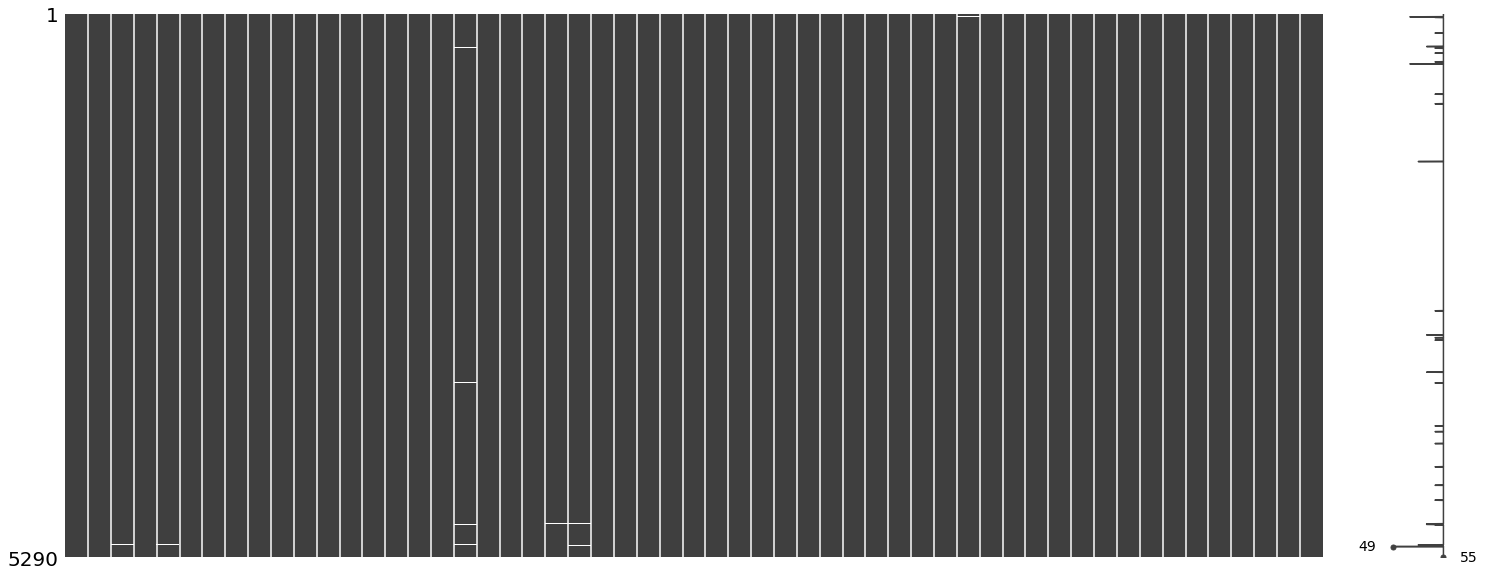

In [ ]:
msno.matrix(df_test.sort_values('date'))

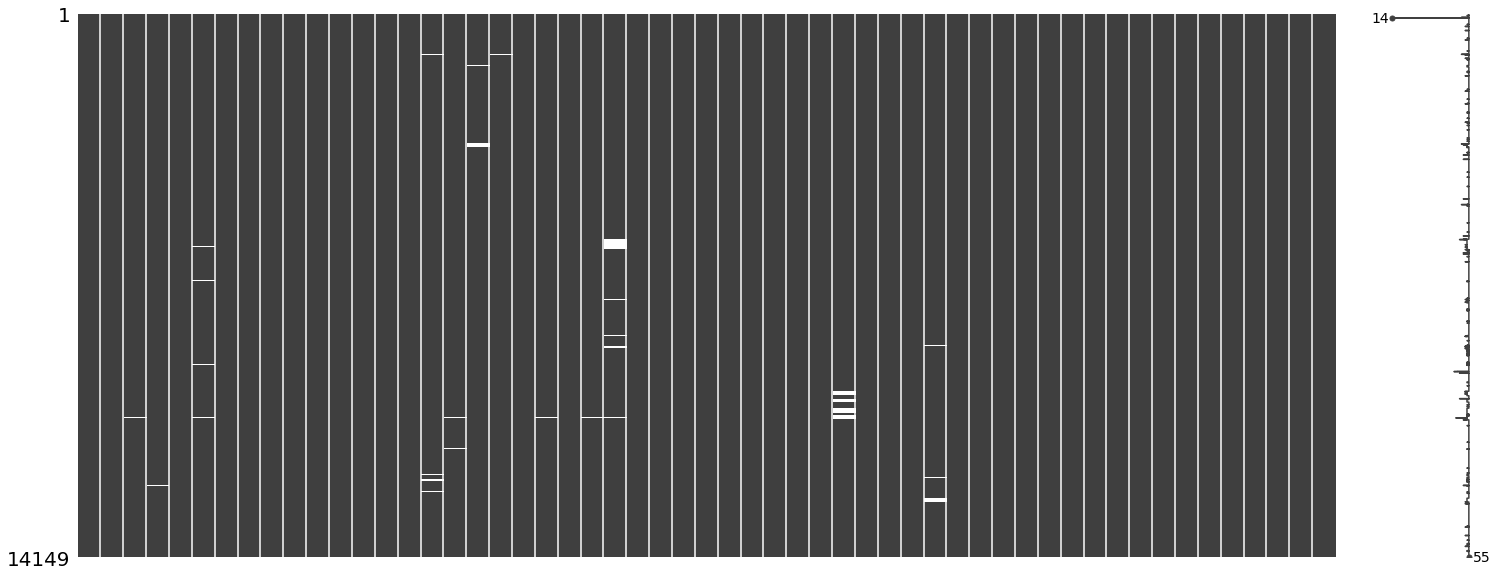

In [ ]:
msno.matrix(df_train.sort_values('date'))

Т.к. наши данные расположены в хронологическом порядке, целесообразно использовать для заполнения метод interpolate. Полиномиальная кривая 5 степени выбрана,т.к. она имеет достаточно много изгибов, чтобы подстроиться под данные, но сохранить следование тренду.

In [ ]:
df_test = df_test.interpolate(method='polynomial', order=5)
df_train = df_train.interpolate(method='polynomial', order=5)
print(df_train.isnull().sum().sum())
print(df_test.isnull().sum().sum())

0
0


Распределение данных показывает, что многие переменные существенно скошенны, а данные содержат выбросы:

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
final.output.recovery,14149.0,66.518832,10.295402,0.000000,62.545817,67.432775,72.346428,100.000000
primary_cleaner.input.sulfate,14149.0,133.258053,39.744486,-152.065016,106.957255,133.000805,159.830443,319.511068
primary_cleaner.input.depressant,14149.0,8.854889,3.420868,-21.319295,6.038393,8.034599,11.522173,27.658578
primary_cleaner.input.feed_size,14149.0,7.322310,0.614062,1.080000,6.960000,7.290000,7.700000,10.470000
primary_cleaner.input.xanthate,14149.0,0.877922,0.395677,-4.197169,0.604513,0.887473,1.100415,2.512968
primary_cleaner.state.floatbank8_a_air,14149.0,1608.019384,128.387557,0.006352,1595.695815,1601.827195,1699.717397,2079.531340
primary_cleaner.state.floatbank8_a_level,14149.0,-488.776297,35.703040,-798.641662,-500.287950,-499.909251,-499.378655,-330.134203
primary_cleaner.state.floatbank8_b_air,14149.0,1608.638441,131.114092,0.008700,1558.959943,1601.820517,1700.220315,2114.906758
primary_cleaner.state.floatbank8_b_level,14149.0,-489.172575,33.603392,-740.122129,-500.375607,-499.938140,-499.389771,-347.354380
primary_cleaner.state.floatbank8_c_air,14149.0,1608.880922,134.260199,0.015159,1549.869870,1601.574628,1700.463017,2013.156457


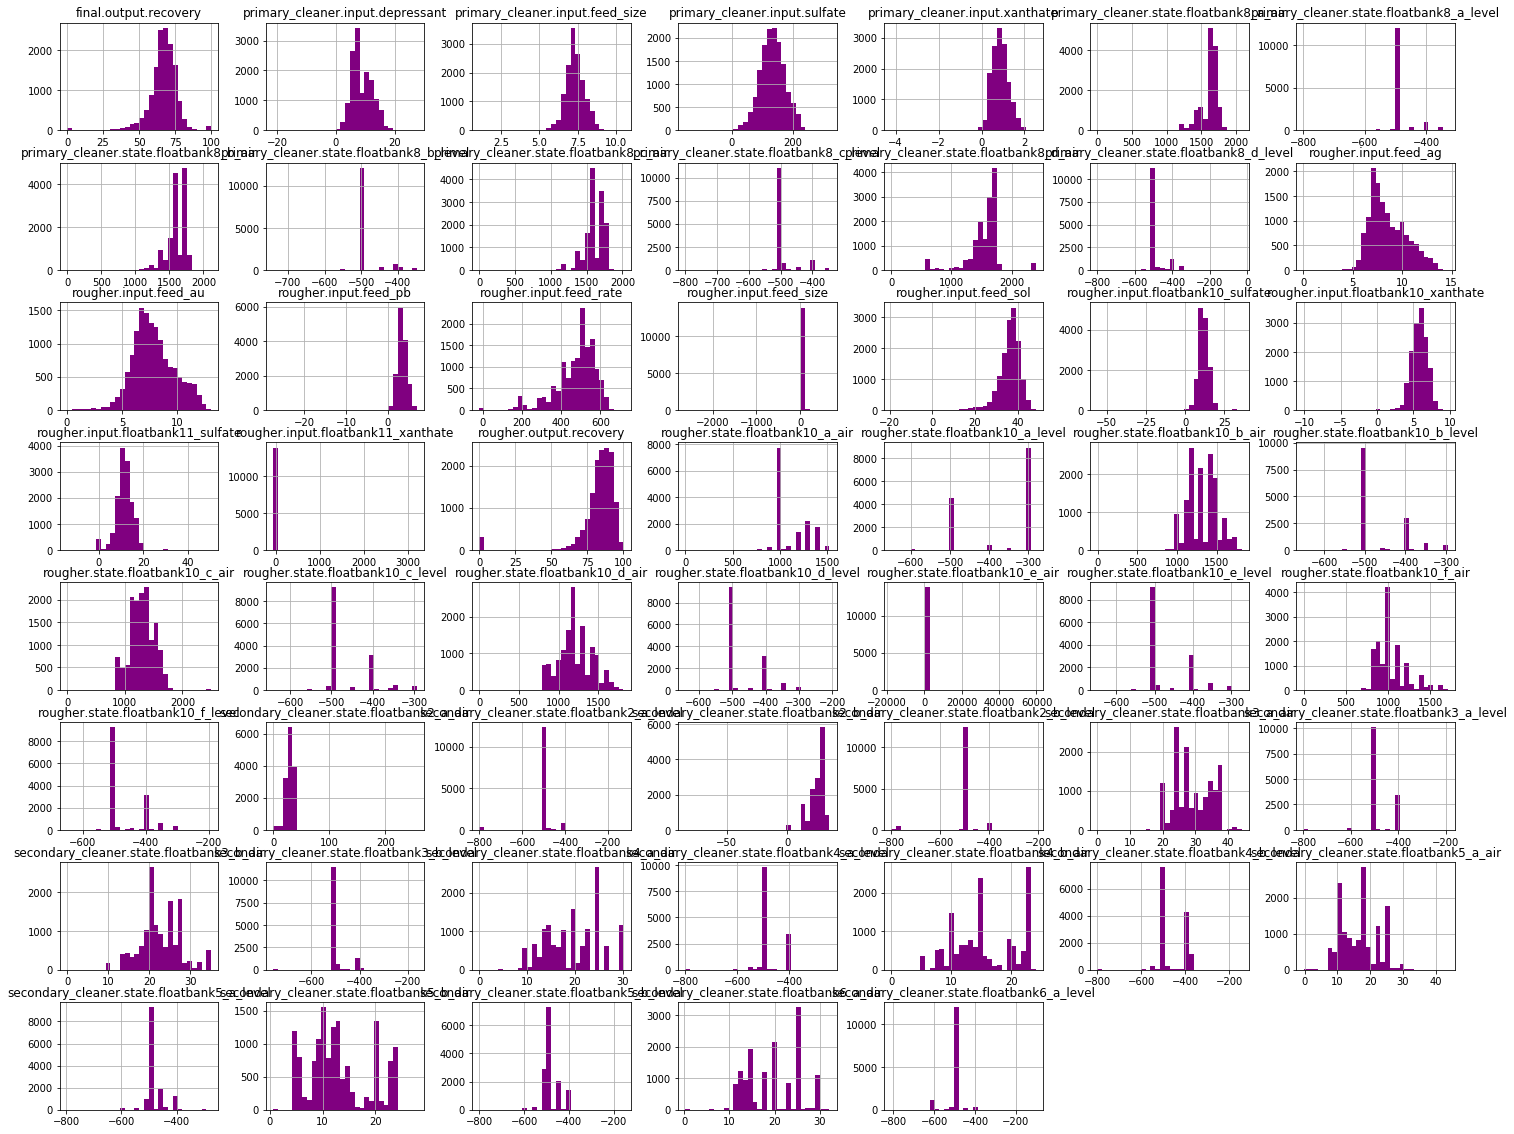

In [ ]:
df_train.hist(bins=30, color = 'Purple', figsize = (25,20))
plt.show()

Однако в данном проекте у нас нет информации о характере каждого фактора и пределах его изменения, поэтому на данном этапе мы не будем удалять "выбросы" правой части шкалы.

Тем не менее все переменные, содержащие "input" в названии - это параметры сырья или продукта на входе в очередной этап очистки (скорость подачи, размер гранул, содержание различных химических соединений), и отрицательная часть шкалы для них нехарактерна. Таких значений немного и они, как правило, далеко отстоят от положительных значений:

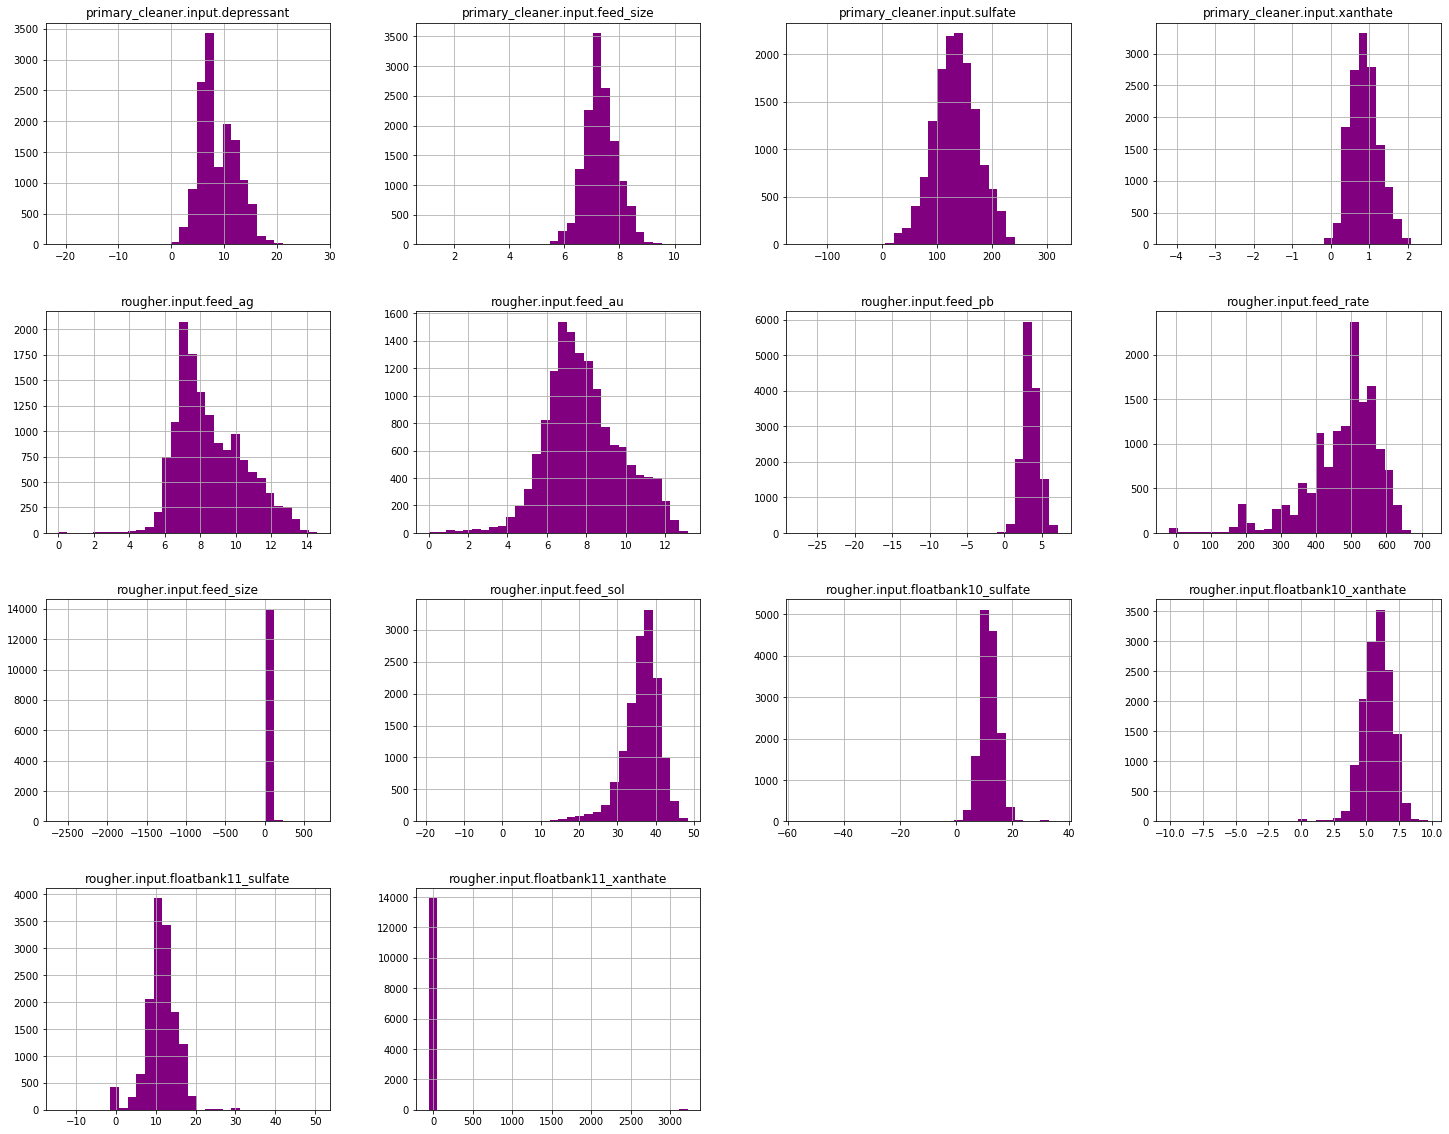

,count,mean,std,min,25%,50%,75%,max
primary_cleaner.input.sulfate,14149.0,133.258053,39.744486,-152.065016,106.957255,133.000805,159.830443,319.511068
primary_cleaner.input.depressant,14149.0,8.854889,3.420868,-21.319295,6.038393,8.034599,11.522173,27.658578
primary_cleaner.input.feed_size,14149.0,7.322310,0.614062,1.080000,6.960000,7.290000,7.700000,10.470000
primary_cleaner.input.xanthate,14149.0,0.877922,0.395677,-4.197169,0.604513,0.887473,1.100415,2.512968
rougher.input.feed_ag,14149.0,8.579195,1.896284,0.010000,7.132802,8.156092,9.918304,14.596026
rougher.input.feed_pb,14149.0,3.460764,1.475905,-27.477079,2.766515,3.414267,4.220115,7.142594
rougher.input.feed_rate,14149.0,473.944199,104.169531,-18.940694,420.723210,499.449303,547.326781,717.508837
rougher.input.feed_size,14149.0,52.555549,128.050814,-2621.344823,48.889202,55.283606,66.037014,670.522356
rougher.input.feed_sol,14149.0,36.251036,5.112357,-19.182024,34.072010,36.995478,39.410696,48.363177
rougher.input.feed_au,14149.0,7.866577,1.919506,0.010000,6.596217,7.649138,9.066976,13.126043


In [ ]:
df_train[[i for i in list(df_train.columns) if 'input' in i]].hist(bins=30, color = 'Purple', figsize = (25,20))
plt.show()
df_train[[i for i in list(df_train.columns) if 'input' in i]].describe().T

Заменим отрицательную часть шкалы на нули для тренировочного и для тестового сета данных.

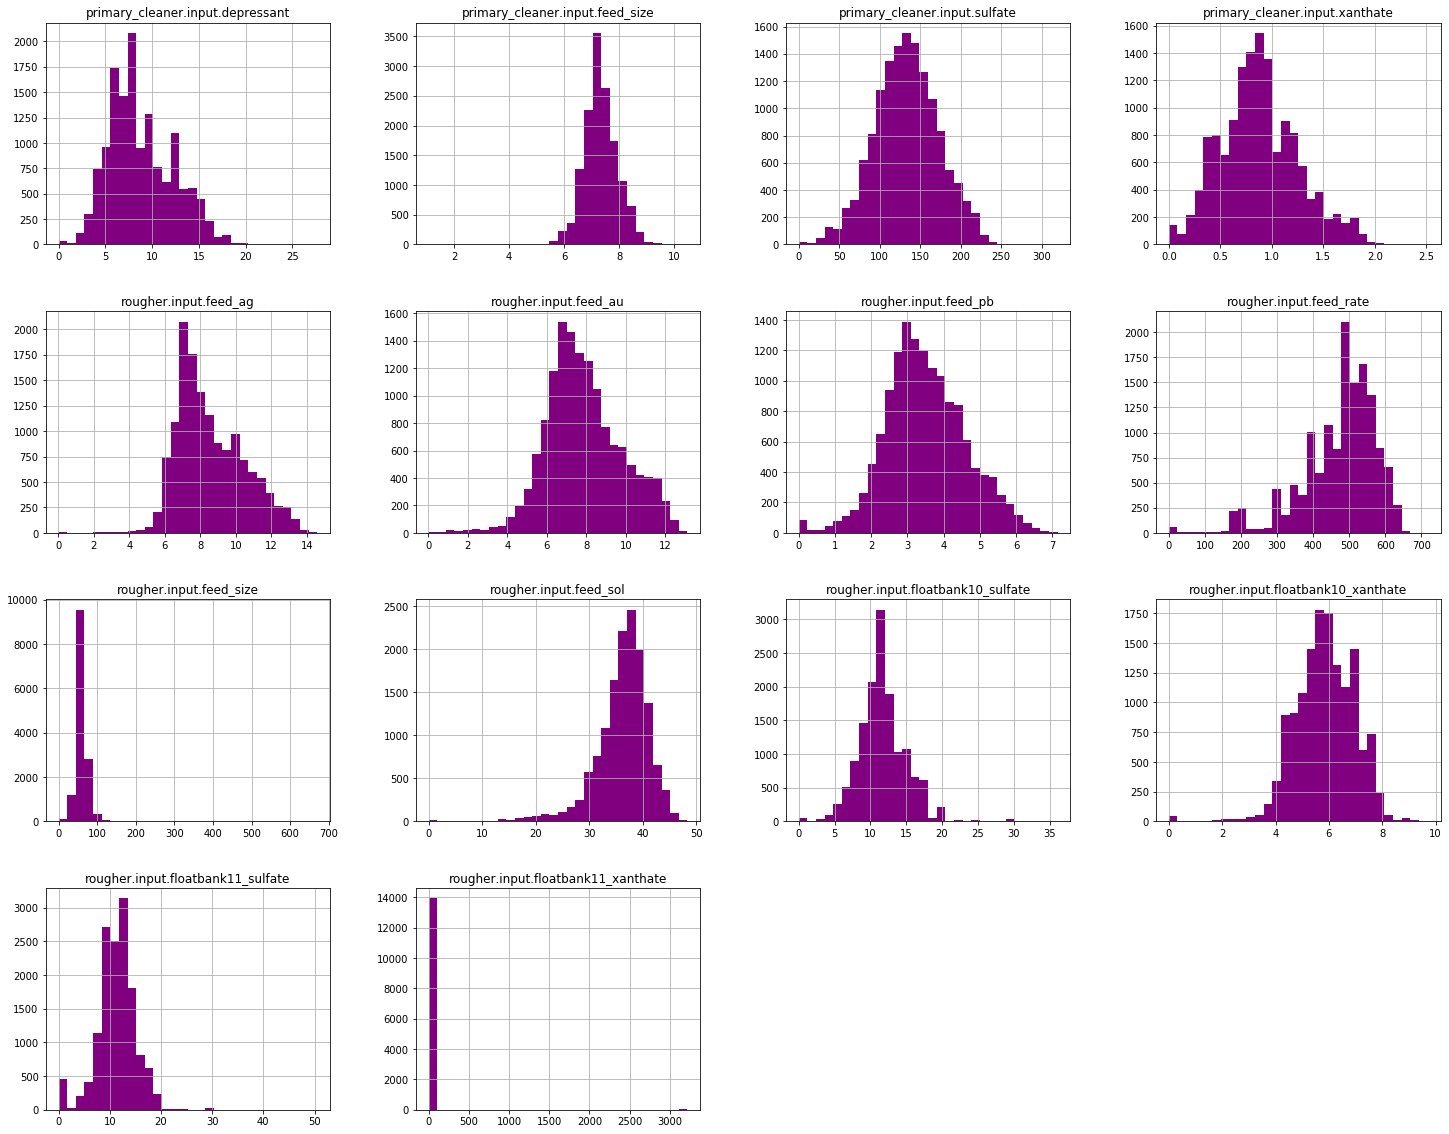

In [ ]:
for column in df_train[[i for i in list(df_train.columns) if 'input' in i]]:
    df_train[column].where(~(df_train[column] < 0), other=0, inplace=True)
df_train[[i for i in list(df_train.columns) if 'input' in i]].hist(bins=30, color = 'Purple', figsize = (25,20))
plt.show()

Аналогично для тестового набора данных:

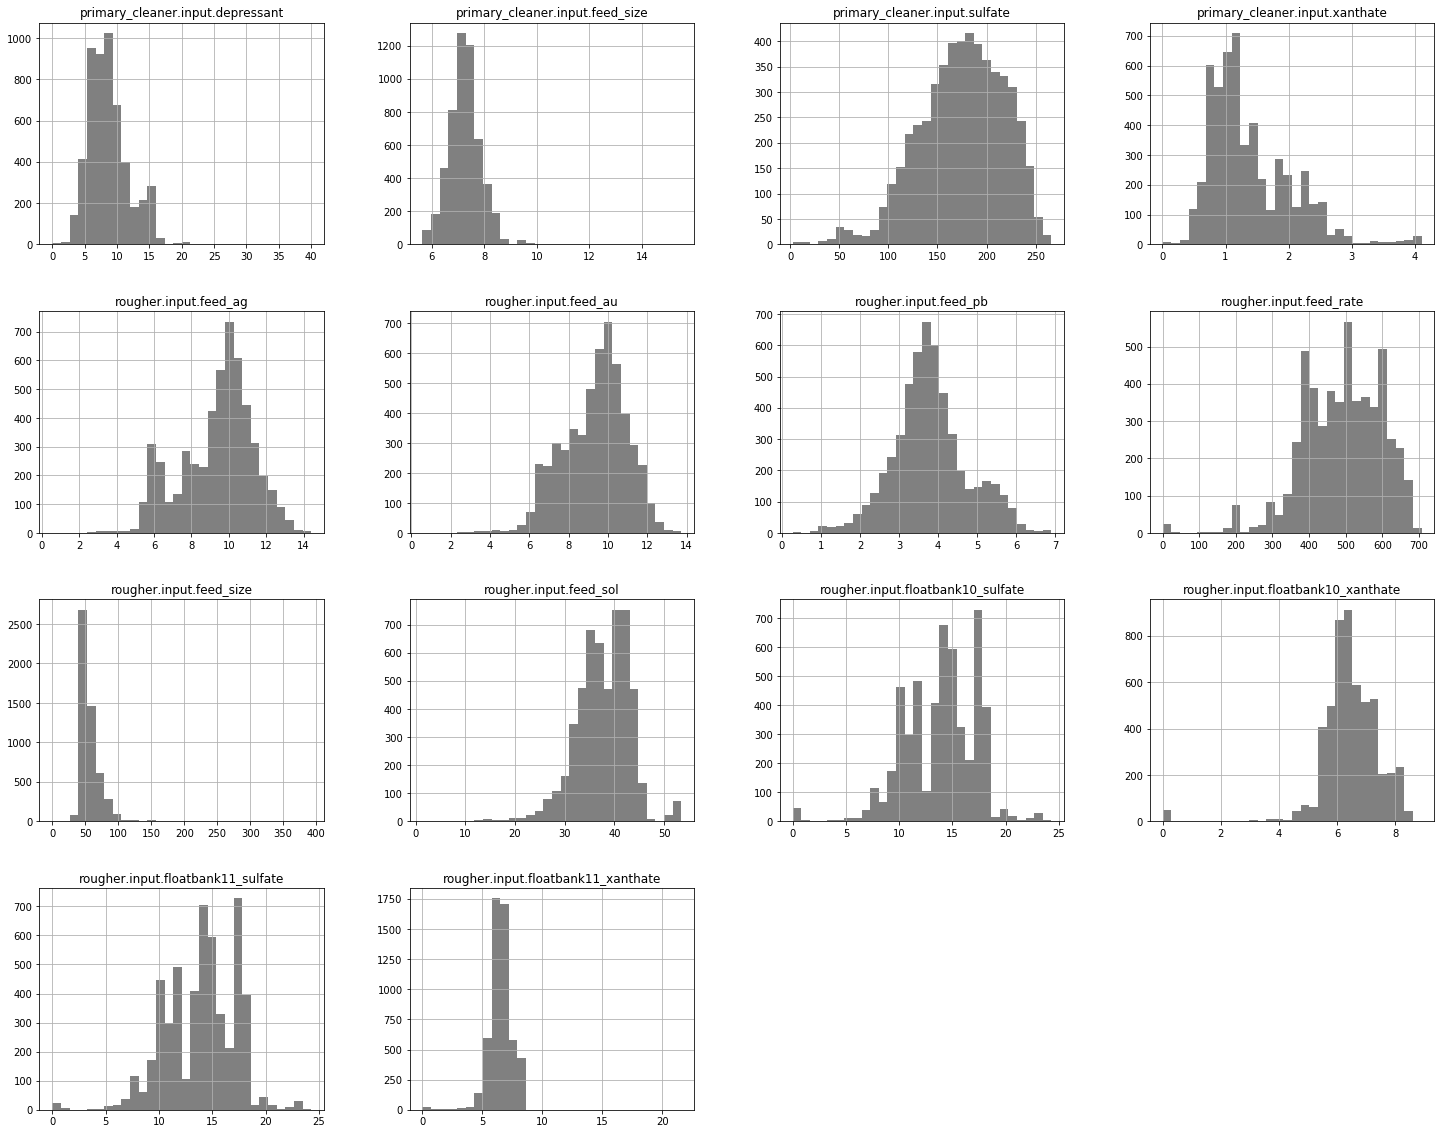

In [ ]:
for column in df_test[[i for i in list(df_test.columns) if 'input' in i]]:
    df_test[column].where(~(df_test[column] < 0), other=0, inplace=True)
df_test[[i for i in list(df_test.columns) if 'input' in i]].hist(bins=30, color = 'Grey', figsize = (25,20))
plt.show()

Для двух переменных имеет смысл в обоих сетах ограничить верхний предел. Это rougher.input.floatbank11_xanthate (заменим на 10 всё, что больше 10 по аналогии с тем, как выглядит распределение переменной rougher.input.floatnabk10_xanthate) и rougher.input.feed_size (заменим на 200 всё, что больше 200):

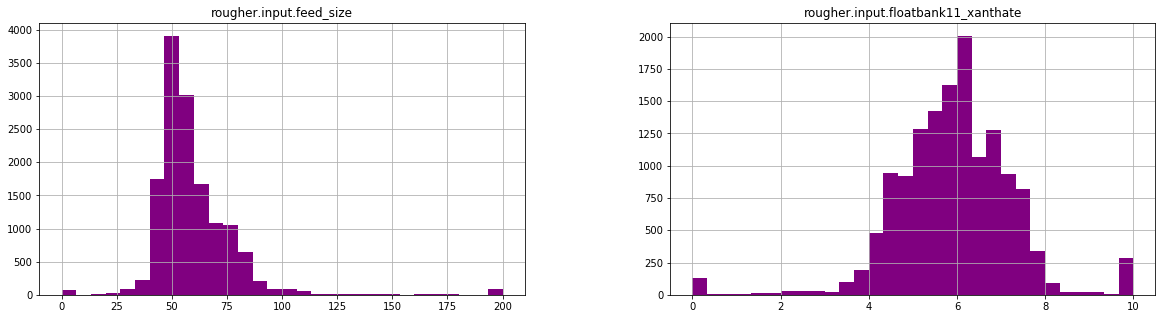

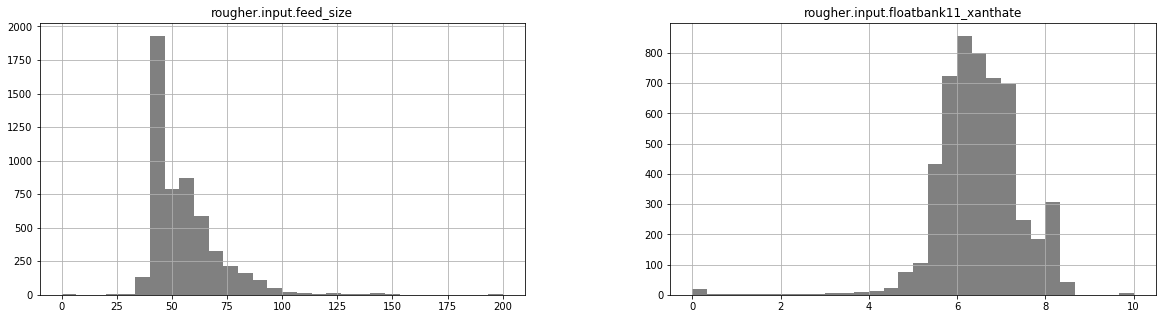

In [ ]:
df_train['rougher.input.floatbank11_xanthate'].where(~(df_train['rougher.input.floatbank11_xanthate'] > 10), 
                                                     other=10, inplace=True)
df_train['rougher.input.feed_size'].where(~(df_train['rougher.input.feed_size'] > 200), 
                                                     other=200, inplace=True)
df_train[['rougher.input.floatbank11_xanthate', 'rougher.input.feed_size']].hist(bins=30, color = 'Purple', figsize = (20,5))
plt.show()

df_test['rougher.input.floatbank11_xanthate'].where(~(df_test['rougher.input.floatbank11_xanthate'] > 10), 
                                                     other=10, inplace=True)
df_test['rougher.input.feed_size'].where(~(df_test['rougher.input.feed_size'] > 200), 
                                                     other=200, inplace=True)
df_test[['rougher.input.floatbank11_xanthate', 'rougher.input.feed_size']].hist(bins=30, color = 'Grey', figsize = (20,5))
plt.show()

## Анализ данных

### Проанализируем концентрацию металлов на каждом этапе очистки
Т.к. мы уже знаем, что средние переменных будут нестабильны из-за специфики распределения, возьмём более устойчивую к выбросам старистику - медиану.

,stage,Au,Ag,Pb
0,rougher.input.feed,8.125839,8.593574,3.534895
1,rougher.output.concentrate,20.280214,12.098115,7.742580
2,primary_cleaner.output.concentrate,32.841295,8.507298,10.152433
3,final.output.concentrate_au,45.011244,5.066094,10.102433


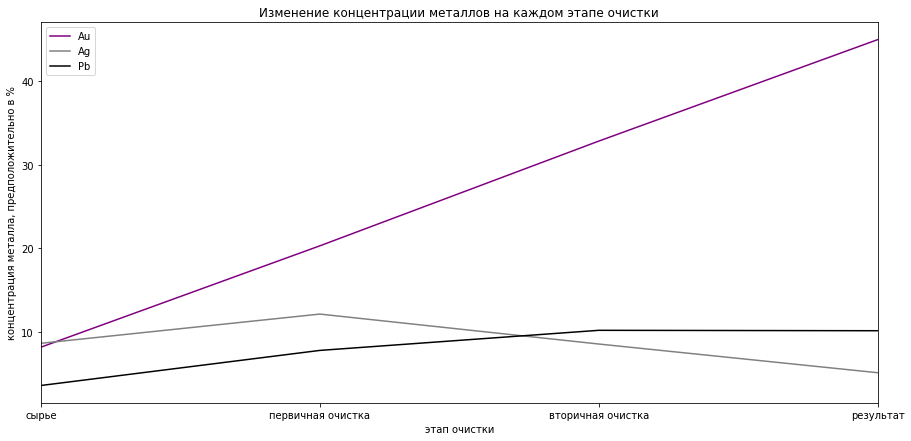

In [ ]:
concentrations= pd.DataFrame({'stage': ['rougher.input.feed',
                                        'rougher.output.concentrate',
                                        'primary_cleaner.output.concentrate',
                                        'final.output.concentrate_au'],
              'Au': [df_full['rougher.input.feed_au'].median(),
                       df_full['rougher.output.concentrate_au'].median(),
                       df_full['primary_cleaner.output.concentrate_au'].median(),
                    df_full['final.output.concentrate_au'].median()],
              'Ag': [df_full['rougher.input.feed_ag'].median(),
                       df_full['rougher.output.concentrate_ag'].median(),
                       df_full['primary_cleaner.output.concentrate_ag'].median(),
                    df_full['final.output.concentrate_ag'].median()],
              'Pb': [df_full['rougher.input.feed_pb'].median(),
                       df_full['rougher.output.concentrate_pb'].median(),
                       df_full['primary_cleaner.output.concentrate_pb'].median(),
                    df_full['final.output.concentrate_pb'].median()]})
display(concentrations)

concentrations.plot(figsize=(15, 7), color=["purple", 'grey', 'black'])

plt.title('Изменение концентрации металлов на каждом этапе очистки')
plt.ylabel('концентрация металла, предположительно в %')
plt.xlabel('этап очистки')
plt.xticks([0, 1, 2, 3], ['сырье', 'первичная очистка', 'вторичная очистка', 'результат'])
plt.show()

Вывод: концентрация золота увеличивается примерно в 5 раз, что в целом и является смыслом всего производственного процесса. Однако мы видим, что результат не 100%. Одновременно с золотом повышается и концентрация свинца, но массовая доля данного металла не превышает 10% в итоговом проукте. Очистка успешно справляется с серебром концентрация которого снижается примерно в 2 раза и не превышает 5%.

### Сравним размеры гранул сырья на обучающей и тестовой выборках
Нам необходимо обеспечить однородность выборки тестовых и обучающих данных. Различия возможны, но они должны быть несущественны.

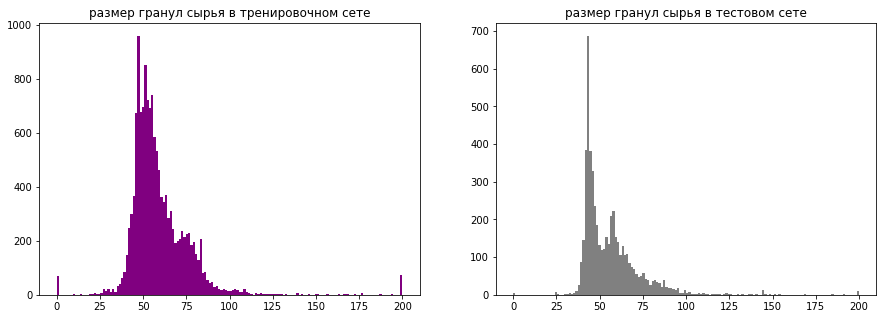

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].set_title('размер гранул сырья в тренировочном сете')
axs[0].hist(df_train['rougher.input.feed_size'], bins = 150, color='purple')
axs[1].set_title('размер гранул сырья в тестовом сете')
axs[1].hist(df_test['rougher.input.feed_size'], bins = 150, color='grey')

plt.show()

Данные визуально схожи: в основном значения сконцентрированы вокруг пика в 50 единиц, после 100 единиц объем данных существенно сокращается. Проверим гипотезу об отсутствии различий t-тестом:

In [ ]:
_, p_value = st.ttest_ind(df_train['rougher.input.feed_size'], df_test['rougher.input.feed_size'], equal_var=False)
alpha = 0.05

print(p_value)
if p_value > alpha:
    print('Размеры гранул в train и test не отличаются')
else:
    print('Размеры гранул в train и test значимо отличаются')

2.836725980242098e-40
Размеры гранул в train и test значимо отличаются


In [ ]:
print(df_train['rougher.input.feed_size'].describe())
df_test['rougher.input.feed_size'].describe()

count    14149.000000
mean        59.506448
std         18.948466
min          0.000000
25%         48.889202
50%         55.283606
75%         66.037014
max        200.000000
Name: rougher.input.feed_size, dtype: float64


count    5290.000000
mean       55.762999
std        16.801783
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       200.000000
Name: rougher.input.feed_size, dtype: float64

Вывод: отличия, безусловно, есть (гранулы тестовой выборки на 10% меньше), и разница статистически значима, однако у нас есть экспертная оценка такой разницы как незначимой, т.к. полученные данные на каждом замере есть усреднённое крайне разбросанных значений.

### Суммарная концентрация всех веществ

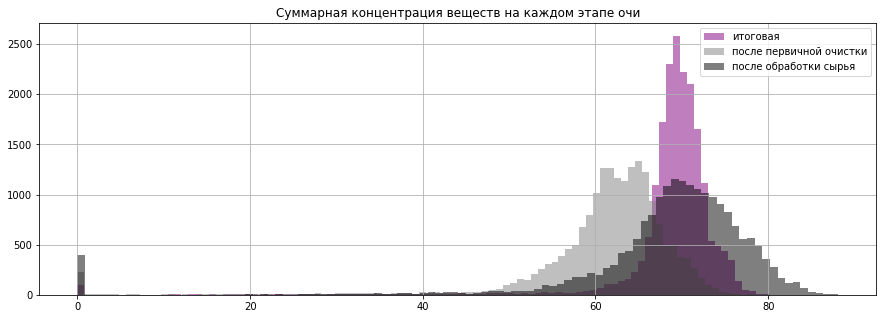

In [ ]:
df_full['final.output.concentrate'] = (
    df_full['final.output.concentrate_ag'] +
    df_full['final.output.concentrate_pb'] +
    df_full['final.output.concentrate_sol'] +
    df_full['final.output.concentrate_au'])
            
df_full['primary_cleaner.output.concentrate'] = (df_full['primary_cleaner.output.concentrate_ag'] +
                                                df_full['primary_cleaner.output.concentrate_pb'] +
                                                df_full['primary_cleaner.output.concentrate_sol'] +
                                                df_full['primary_cleaner.output.concentrate_au'])
        
df_full['rougher.output.concentrate'] = (df_full['rougher.output.concentrate_ag'] +
                                        df_full['rougher.output.concentrate_pb'] +
                                        df_full['rougher.output.concentrate_sol'] +
                                        df_full['rougher.output.concentrate_au'])
            
df_full['final.output.concentrate'].hist(bins = 100, color='purple', alpha = 0.5, figsize=(15, 5))
df_full['primary_cleaner.output.concentrate'].hist(bins = 100, color='grey', alpha = 0.5, figsize=(15, 5))
df_full['rougher.output.concentrate'].hist(bins = 100, color='black', alpha = 0.5, figsize=(15, 5))
plt.title('Суммарная концентрация веществ на каждом этапе очи')
labels= ["итоговая","после первичной очистки", "после обработки сырья"]
plt.legend(labels)
plt.show()

Суммарно концентрация после трёх этапов не приближается к 100%. Однако её дисперсия существенно сокращается, поэтому в целом мы получаем меньший разброс значений. Также мы помним, что концентрация золота всё-таки повышается, что говорит об эффективности технологии в целом.

На графике мы видим нулевые суммарные концентрации веществ, что, скорее всего, является ошибкой, т.к. такие частицы в обработку не поступают. Удалим аномалии (нулевые суммарные концентрации) из обеих выборок.

In [ ]:
df_train = df_train[~df_train['date'].isin(list(df_full[df_full['final.output.concentrate'] == 0]['date']))]
df_test = df_test[~df_test['date'].isin(list(df_full[df_full['final.output.concentrate'] == 0]['date']))]

df_train = df_train[~df_train['date'].isin(list(df_full[df_full['primary_cleaner.output.concentrate'] == 0]['date']))]
df_test = df_test[~df_test['date'].isin(list(df_full[df_full['primary_cleaner.output.concentrate'] == 0]['date']))]

df_train = df_train[~df_train['date'].isin(list(df_full[df_full['rougher.output.concentrate'] == 0]['date']))]
df_test = df_test[~df_test['date'].isin(list(df_full[df_full['rougher.output.concentrate'] == 0]['date']))]

print(len(df_train))
len(df_test)

13725


5123

Вывод: мы удалили 3% наблюдений по причине крайне странных нулевых значений суммарных концентраций металлов, что говорит об ошибках наблюдения. В тренировочной выборке осталось 13 725 случаев, в тестовой - 5 123.

## Модель

Для реализации проекта необходимо спрогнозировать сразу две величины:
эффективность обогащения чернового концентрата rougher.output.recovery;
эффективность обогащения финального концентрата final.output.recovery.

### Вычисление итоговой sMAPE: функции

Создадим функции для расчёта симметричной средней абсолютной ошибка в процентах для обоих предсказываемых признаков:

In [ ]:
def smape(y_true, y_pred):
    error = abs(y_true - y_pred)
    scale = (abs(y_true) + abs(y_pred)) / 2
    result = (error / scale).mean()
    return result

### Подготовим данные для построения моделей:

In [ ]:
X_rougher = df_train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
y_rougher = df_train['rougher.output.recovery']

X_final = df_train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
y_final = df_train['final.output.recovery']

X_rougher_test = df_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
y_rougher_test = df_test['rougher.output.recovery']

X_final_test = df_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
y_final_test = df_test['final.output.recovery']


scaler = StandardScaler()
X_rougher = scaler.fit_transform(X_rougher)
X_final = scaler.fit_transform(X_final)
X_rougher_test = scaler.fit_transform(X_rougher_test)
X_final_test = scaler.fit_transform(X_final_test)

Масштабирование признаков необходимо, т.к. они имеют очень разную размерность и все они преимущественно количественные. Чтобы модель не отдавала предпочтение признакам с большим разбросом, мы прибегли к масштабированию.

Обучим 3 модели и рассчитаем ключевую метрику sMAPE для каждой из них.

In [ ]:
models = [DecisionTreeRegressor(random_state = 42), 
          RandomForestRegressor(random_state = 42), 
          LinearRegression()]


results_cross_val = []

for model in models: 
    
    cross_val_score_rougher = cross_val_score(model, 
                                              X_rougher, 
                                              y_rougher, 
                                              cv=30,
                                              scoring = make_scorer(smape, greater_is_better=False)).mean()
    cross_val_score_final = cross_val_score(model, 
                                            X_final, 
                                            y_final, 
                                            cv=30,
                                            scoring = make_scorer(smape, greater_is_better=False)).mean()

    results_cross_val.append({'model name': model.__class__.__name__, 
                              'cross_val_score_rougher': cross_val_score_rougher, 
                              'cross_val_score_final': cross_val_score_final,
                              'cross_val_score_total': cross_val_score_rougher*0.25 + cross_val_score_final*0.75}) 
              
pd.DataFrame(results_cross_val)

,model name,cross_val_score_rougher,cross_val_score_final,cross_val_score_total
0,DecisionTreeRegressor,-0.074762,-0.131025,-0.116959
1,RandomForestRegressor,-0.053982,-0.090645,-0.081480
2,LinearRegression,-0.056499,-0.099111,-0.088458


In [ ]:
tb = pd.DataFrame(results_cross_val)
print('Минимальное значение итоговой sMAPE:', abs(tb['cross_val_score_total']).min())
print('Его показала модель:', tb[abs(tb['cross_val_score_total']) == abs(tb['cross_val_score_total']).min()]['model name'][1])

Минимальное значение итоговой sMAPE: 0.08147957772033632
Его показала модель: RandomForestRegressor


Наилучшими показателями обладает модель случайного леса, т.к. размеры средней оценки качества наиболее близки к нулю, а значение эффективности обогащения финального концентрата для нас имеет большее значение, чем эффективность обогащения чернового. Cимметричная средняя абсолютная ошибка в процентах для случайного леса - 8%.

### Проверка лучшей модели на тестовой выборке

Проверим значение ключевого показателя - sMAPE - для модели случайного леса на тестовой выборке.

In [ ]:
cross_val_score_rougher = cross_val_score(RandomForestRegressor(random_state = 42), 
                                          X_rougher_test, 
                                          y_rougher_test, 
                                          cv=30,
                                          scoring = make_scorer(smape, greater_is_better=False)).mean()
cross_val_score_final = cross_val_score(RandomForestRegressor(random_state = 42), 
                                        X_final_test, 
                                        y_final_test, 
                                        cv=30,
                                        scoring = make_scorer(smape, greater_is_better=False)).mean()

print('Значение итоговой sMAPE на тестовой выборке:', cross_val_score_rougher * 0.25 + cross_val_score_final * 0.75)

Значение итоговой sMAPE на тестовой выборке: -0.06765340651177208


Вывод: разница между метриками тестовой и тренировочной выборки несущественная, величина симметричной абсолютной ошибки небольшая. Мы получили 8% на тренировочной выборке и 7% - на тестовой, что говорит о том, что мы получили значимую модель, которая устойчиво предсказывает эффективность обогащения по входным данным.

Проверим, насколько полученная модель лучше того, что можно было бы получить без модели.

### Оценка успешности выбранной модели

In [ ]:
dummy_regressor_rougher = DummyRegressor(strategy="median").fit(X_rougher, y_rougher)
y_rougher_predicted_by_median = dummy_regressor_rougher.predict(X_rougher_test)
print('sMAPE простой медианы для промежуточного результата:', smape(y_rougher_test, y_rougher_predicted_by_median))

dummy_regressor_final = DummyRegressor(strategy="median").fit(X_final, y_final)
y_final_predicted_by_median = dummy_regressor_final.predict(X_final_test)
print('sMAPE простой медианы для конечного результата:', smape(y_final_test, y_final_predicted_by_median))

print('Итоговая sMAPE простой медианы:',
      smape(y_rougher_test, y_rougher_predicted_by_median) * 0.25 + smape(y_final_test, y_final_predicted_by_median) * 0.75)

sMAPE простой медианы для промежуточного результата: 0.048090330660298004
sMAPE простой медианы для конечного результата: 0.08222545492433414
Итоговая sMAPE простой медианы: 0.0736916738583251


## Вывод
Эффективность модели по показателю итоговой sMAPE не отличается от подстановки простых медиан, что можно сделать и без регрессии. Редуцирование большого количества признаков до неболшого числа факторов (см. следующий блок кода) также не даёт результата в приближении sMAPE к нулю, т.е. анализ принципиальных компонентов также не улучшает качество модели. Необходимо дальнейшее исследование факторов для построения более точной модели. 

In [ ]:
from sklearn.decomposition import PCA


PC_rougher=PCA(n_components=5).fit_transform(X_rougher)
cross_val_score_rougher = cross_val_score(RandomForestRegressor(random_state = 42), 
                                          pd.DataFrame(data=PC_rougher), 
                                          y_rougher, 
                                          cv=10,
                                          scoring = make_scorer(smape, greater_is_better=False)).mean()

PC_final=PCA(n_components=5).fit_transform(X_final)
cross_val_score_final = cross_val_score(RandomForestRegressor(random_state = 42), 
                                        pd.DataFrame(data=PC_final), 
                                        y_final, 
                                        cv=10,
                                        scoring = make_scorer(smape, greater_is_better=False)).mean()

print('Значение итоговой sMAPE на тренировочной выборке по пяти факторам:',
      cross_val_score_rougher * 0.25 + cross_val_score_final * 0.75)

Значение итоговой sMAPE на тренировочной выборке по пяти факторам: -0.10606095885156085
